In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector
from math import sqrt, pi
import numpy as np

# Quantum teleportation

Quantum teleportation is a technique for transferring quantum information  from a sender (Alice) at one location to a receiver (Bob) some distance away, by employing entangled states (Bell state)

 Step 0: set up 3 quantum register and 2 classical register

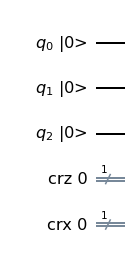

In [86]:
qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
teleportation_circuit = QuantumCircuit(qr, crz, crx)
teleportation_circuit.draw(output='mpl', initial_state=True)
#q0 and q1 are Alice's qubit and q2 is Bob qubit
#aim: teleport the q0 qubit information to bob's qubit (q2)

 Step 1: create entangle state. 

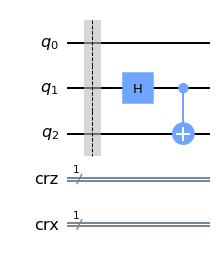

In [87]:
teleportation_circuit.barrier()
teleportation_circuit.h(1)
teleportation_circuit.cx(1,2)
teleportation_circuit.draw()

 Step 2: Alice perform CNOT gate to q1 controled by q0 and H gate on q0

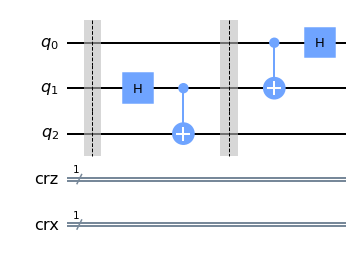

In [88]:
teleportation_circuit.barrier()
teleportation_circuit.cx(0,1)
teleportation_circuit.h(0)
teleportation_circuit.draw(output='mpl')

 Step 3: Next, Alice applies a measurement to both qubits that she owns (q0,q1). Stores measurement of q0 to crz and measurement of q1 to crx. She then sends these two classical bits to Bob.

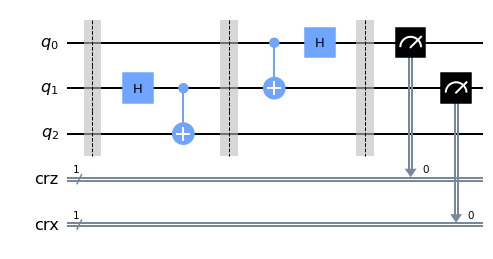

In [89]:
teleportation_circuit.barrier()
teleportation_circuit.measure(0,0)
teleportation_circuit.measure(1,1)
teleportation_circuit.draw(output='mpl')

Step 4:
Bob do the following.

If (crz,crx)=(0,0) then do nothing

If (crz,crx)=(0,1) then apply X gate

If (crz,crx)=(1,0) then apply Z gate

If (crz,crx)=(1,1) then apply ZX gate (i.e. apply X first, then Z)

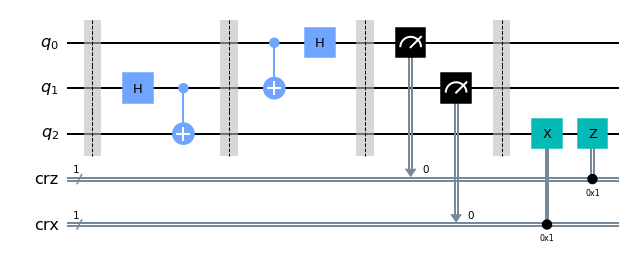

In [90]:
teleportation_circuit.barrier()
teleportation_circuit.x(2).c_if(crx,1)
teleportation_circuit.z(2).c_if(crz,1)
teleportation_circuit.draw(output='mpl')

# summary

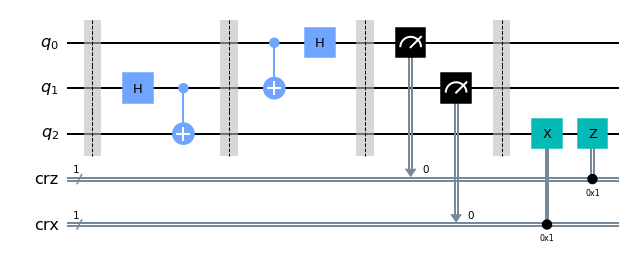

In [96]:
qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
teleportation_circuit = QuantumCircuit(qr, crz, crx)
#step 1
#entangles qubits q1 and q2
teleportation_circuit.barrier()
teleportation_circuit.h(1)
teleportation_circuit.cx(1,2)

#step2 (Alice's action)
#apply CNOT to q1 control by q0
#apply H to q0
teleportation_circuit.barrier()
teleportation_circuit.cx(0,1)
teleportation_circuit.h(0)

#step3
#Alice take measurement and send the classical information to Bob
teleportation_circuit.barrier()
teleportation_circuit.measure(0,0)
teleportation_circuit.measure(1,1)

#step4 (Bob's action)
teleportation_circuit.barrier()
teleportation_circuit.x(2).c_if(crx,1)
teleportation_circuit.z(2).c_if(crz,1)
teleportation_circuit.draw(output='mpl')

# Verify we have teleported quantum information from q0 to q2

<IPython.core.display.Latex object>

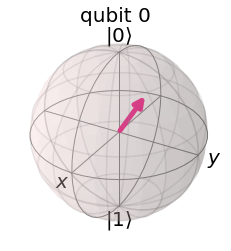

In [97]:
psi = random_statevector(2)
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
init_gate = Initialize(psi)
plot_bloch_multivector(psi)

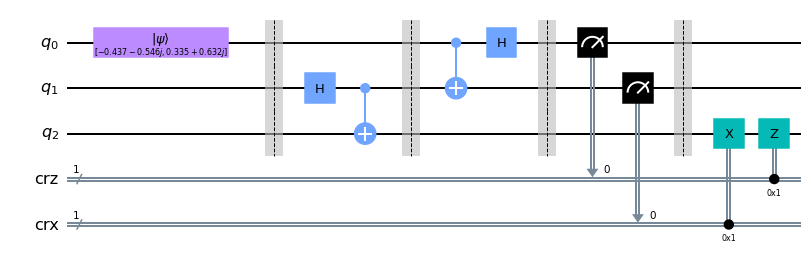

In [98]:
## SETUP
qr = QuantumRegister(3, name="q")   
crz = ClassicalRegister(1, name="crz") 
crx = ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

#set up the qubit that Alice want to teleport
teleportation_circuit.append(init_gate, [0])
teleportation_circuit.barrier()

#entangle state
teleportation_circuit.h(1)
teleportation_circuit.cx(1,2)

#Alice's action
teleportation_circuit.barrier()
teleportation_circuit.cx(0,1)
teleportation_circuit.h(0)

#Alice takes measurement and sent it to Bob
teleportation_circuit.barrier()
teleportation_circuit.measure(0,0)
teleportation_circuit.measure(1,1)

#bob's action
teleportation_circuit.barrier()
teleportation_circuit.x(2).c_if(crx,1)
teleportation_circuit.z(2).c_if(crz,1)
teleportation_circuit.draw(output='mpl')

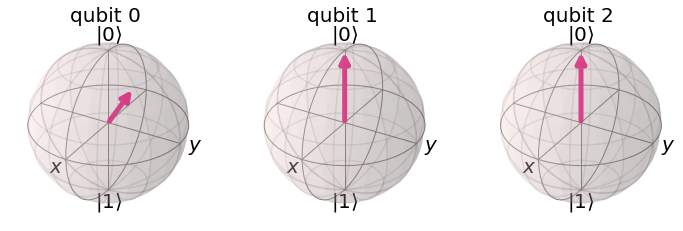

In [99]:
#Initial state of Alice and Bob
qc = QuantumCircuit(3)
qc.append(init_gate, [0])
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
in_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(in_vector)

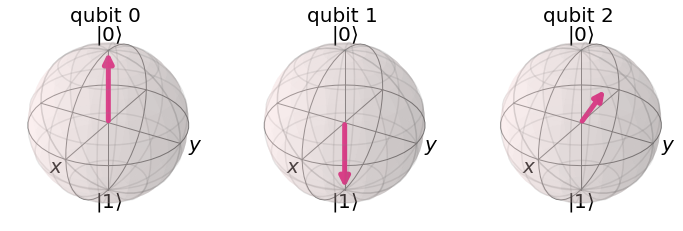

In [100]:
#final state
sim = Aer.get_backend('aer_simulator')
teleportation_circuit.save_statevector()
out_vector = sim.run(teleportation_circuit).result().get_statevector()
plot_bloch_multivector(out_vector)

# second way to verify the circuit

$|0\rangle\xrightarrow{U}|\psi\rangle\xrightarrow{U^{-1}}|0\rangle$

In [101]:
psi = random_statevector(2)
init_gate = Initialize(psi)
inverse_init_gate = init_gate.gates_to_uncompute()

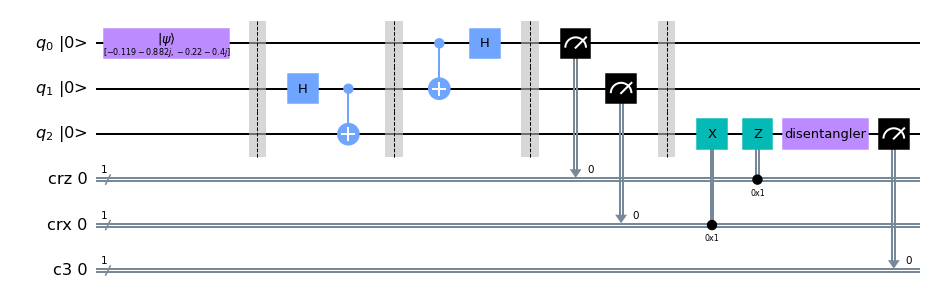

In [102]:
## SETUP
qr = QuantumRegister(3, name="q")   
crz = ClassicalRegister(1, name="crz") 
crx = ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

#set up the qubit that Alice want to teleport
teleportation_circuit.append(init_gate, [0])
teleportation_circuit.barrier()

#entangles qubits q1 and q2
teleportation_circuit.h(1)
teleportation_circuit.cx(1,2)

#Alice's action
teleportation_circuit.barrier()
teleportation_circuit.cx(0,1)
teleportation_circuit.h(0)

#Alice take measurement and send the classical information to Bob
teleportation_circuit.barrier()
teleportation_circuit.measure(0,0)
teleportation_circuit.measure(1,1)

#Bob's action
teleportation_circuit.barrier()
teleportation_circuit.x(2).c_if(crx,1)
teleportation_circuit.z(2).c_if(crz,1)
teleportation_circuit.append(inverse_init_gate, [2])

#Add a classical bit to store the measurement results of q_2
cr_result = ClassicalRegister(1)
teleportation_circuit.add_register(cr_result)
teleportation_circuit.measure(2,2)
teleportation_circuit.draw(output='mpl',initial_state=True)

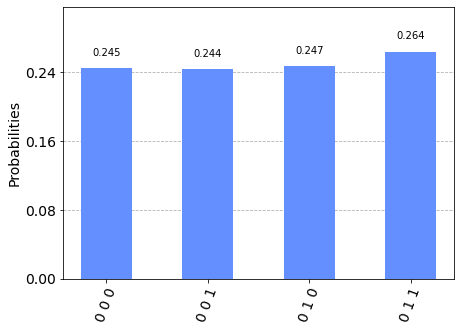

In [103]:
t_qc = transpile(teleportation_circuit, sim)
t_qc.save_statevector()
counts = sim.run(t_qc).result().get_counts()
plot_histogram(counts)

# Teleportation on a Real Quantum Computer

The IBM quantum computers currently do not support instructions after measurements, meaning we cannot run the quantum teleportation in its current form on real hardware.

There is a principle called deferred measurement principle. This principle states that any measurement can be postponed until the end of the circuit, i.e. we can move all the measurements to the end, and we should see the same results.

In other words, measurements commute with quantum gates when the qubit being measured is a control qubit

<img src="https://qiskit.org/textbook/ch-algorithms/images/defer_measurement.svg" width="350"/>

In [104]:
psi = random_statevector(4)

#quantum gate after measurement
qr = QuantumRegister(2,name='q')
cr1 = ClassicalRegister(1,name='c1')
cr2 = ClassicalRegister(1,name='c2')
qc = QuantumCircuit(qr,cr1,cr2)
qc.initialize(psi,[0,1])
qc.barrier()
qc.measure(0,cr1)
qc.x(1).c_if(cr1,1)
qc.measure(1,1)

#quantum gate before measurement
qc_d = QuantumCircuit(qr,cr1,cr2)
qc_d.initialize(psi,[0,1])
qc_d.barrier()
qc_d.cx(0,1)
qc_d.measure([0,1],[0,1])

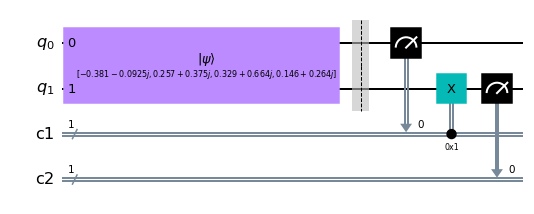

In [105]:
qc.draw(output='mpl')

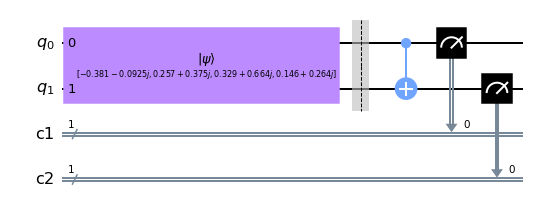

In [106]:
qc_d.draw(output='mpl')

In [107]:
sim = Aer.get_backend('aer_simulator')

t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()

t_qc_d = transpile(qc_d,sim)
counts_d = sim.run(t_qc_d).result().get_counts()

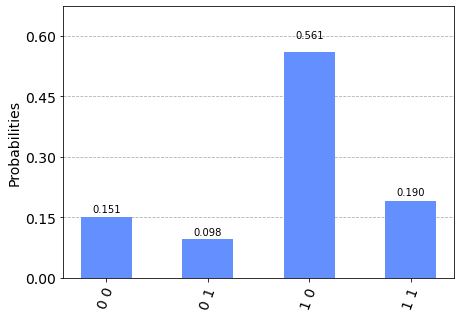

In [108]:
plot_histogram(counts)

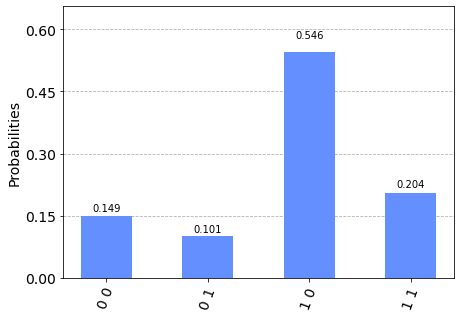

In [109]:
plot_histogram(counts_d)

# Teleportation circuit apply deferred measurement principle

In [110]:
psi = random_statevector(2)
init_gate = Initialize(psi)

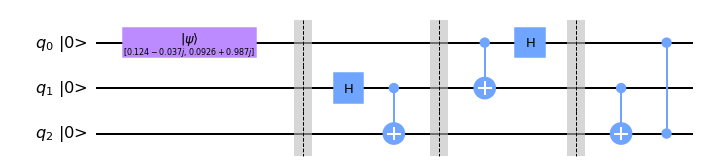

In [111]:
## SETUP
#qr = QuantumRegister(3, name="q")   
#crz = ClassicalRegister(1, name="crz")
#crx = ClassicalRegister(1, name="crx")
#teleportation_circuit = QuantumCircuit(qr, crz, crx)
teleportation_circuit=QuantumCircuit(3)

#set up the qubit that Alice want to teleport
teleportation_circuit.append(init_gate, [0])
teleportation_circuit.barrier()

#entangles qubits q1 and q2
teleportation_circuit.h(1)
teleportation_circuit.cx(1,2)

#Alice action
teleportation_circuit.barrier()
teleportation_circuit.cx(0,1)
teleportation_circuit.h(0)

#Bob's action
teleportation_circuit.barrier()
teleportation_circuit.cx(1,2)
teleportation_circuit.cz(0,2)

teleportation_circuit.draw(output='mpl',initial_state=True)

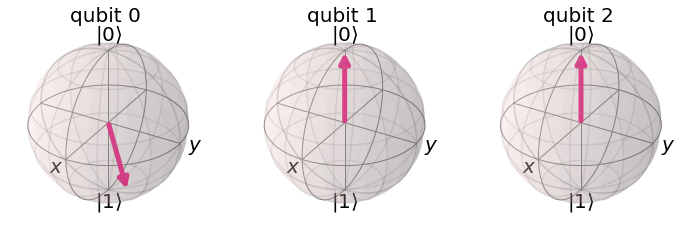

In [112]:
#initial state of Alice and Bob
qc = QuantumCircuit(3)
qc.append(init_gate, [0])
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
in_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(in_vector)

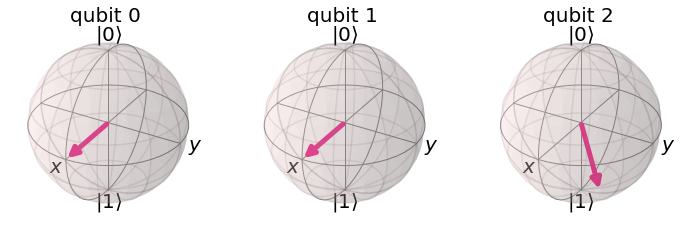

In [113]:
#final state of Alice and Bob
sim = Aer.get_backend('aer_simulator')
teleportation_circuit.save_statevector()
out_vector = sim.run(teleportation_circuit).result().get_statevector()
plot_bloch_multivector(out_vector)

# Verity using count

In [114]:
psi = random_statevector(2)
init_gate = Initialize(psi)
inverse_init_gate = init_gate.gates_to_uncompute()

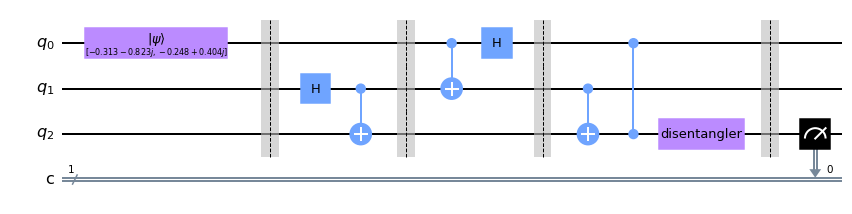

In [115]:
## SETUP
#qr = QuantumRegister(3, name="q")   
#crz = ClassicalRegister(1, name="crz")
#crx = ClassicalRegister(1, name="crx")
#teleportation_circuit = QuantumCircuit(qr, crz, crx)
teleportation_circuit=QuantumCircuit(3,1)

#set up the qubit that Alice want to teleport
teleportation_circuit.append(init_gate, [0])
teleportation_circuit.barrier()

#entangles qubits q1 and q2
teleportation_circuit.h(1)
teleportation_circuit.cx(1,2)

#Alice's action
teleportation_circuit.barrier()
teleportation_circuit.cx(0,1)
teleportation_circuit.h(0)

#Bob's action
teleportation_circuit.barrier()
teleportation_circuit.cx(1,2)
teleportation_circuit.cz(0,2)

#reverse Bob's qubit
teleportation_circuit.append(inverse_init_gate, [2])
teleportation_circuit.barrier()
teleportation_circuit.measure(2,0)
teleportation_circuit.draw(output='mpl')

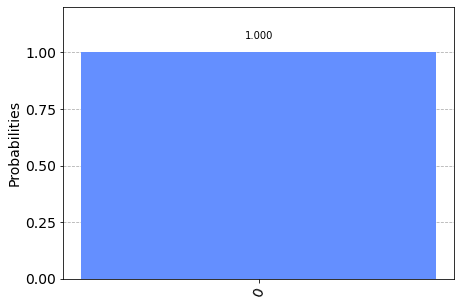

In [116]:
t_qc = transpile(teleportation_circuit, sim)
t_qc.save_statevector()
counts = sim.run(t_qc).result().get_counts()
plot_histogram(counts)